# Analise Estatística Descritiva

# 📘 Dicionário de Dados  
**Projeto:** Previsão de Churn de Clientes de Cartão de Crédito  
**Dataset:** `clientes_cartao_credito_traduzido.csv`  
**Fonte:** Kaggle – Credit Card Customers  

---

## 🧾 Visão Geral

- **Unidade de análise:** Cliente  
- **Total de registros:** 10.127  
- **Tipo de problema:** Classificação binária  
- **Variável alvo:** `Status_Cliente`  

Cada linha do dataset representa um cliente único e suas características demográficas, comportamentais e de uso do cartão de crédito.

---

## 🎯 Variável Alvo

| Variável | Tipo | Descrição |
|--------|------|-----------|
| Status_Cliente | Categórica | Indica se o cliente permanece ativo ou cancelou o cartão |

**Valores possíveis:**
- Cliente Ativo  
- Cliente Cancelado  

---

## 👤 Variáveis Demográficas

| Variável | Tipo | Descrição |
|--------|------|-----------|
| Idade | Inteiro | Idade do cliente em anos |
| Genero | Categórica | Gênero do cliente |
| Numero_Dependentes | Inteiro | Quantidade de dependentes |
| Nivel_Educacao | Categórica | Nível educacional |
| Estado_Civil | Categórica | Estado civil |
| Faixa_Renda | Categórica | Faixa de renda anual estimada |

### Valores Categóricos

- **Genero:** Masculino, Feminino  
- **Nivel_Educacao:**  
  - Ensino Médio  
  - Ensino Superior  
  - Graduação  
  - Pós-Graduação  
  - Doutorado  
  - Sem Escolaridade  
  - Não Informado  
- **Estado_Civil:** Casado, Solteiro, Divorciado, Não Informado  
- **Faixa_Renda:**  
  - Menos de 40k  
  - 40k a 60k  
  - 60k a 80k  
  - 80k a 120k  
  - Acima de 120k  
  - Não Informado  

---

## 💳 Variáveis do Cartão de Crédito

| Variável | Tipo | Descrição |
|--------|------|-----------|
| Categoria_Cartao | Categórica | Tipo do cartão do cliente |
| Limite_Credito | Numérica | Limite total de crédito |
| Saldo_Rotativo | Numérica | Saldo rotativo atual |
| Limite_Disponivel | Numérica | Limite disponível para uso |
| Taxa_Utilizacao_Credito | Numérica | Percentual médio de utilização do limite |

**Valores possíveis – Categoria_Cartao:**  
Azul, Prata, Ouro, Platina

---

## 🔄 Relacionamento com o Banco

| Variável | Tipo | Descrição |
|--------|------|-----------|
| Meses_Relacionamento | Inteiro | Tempo de relacionamento com o banco (meses) |
| Total_Produtos | Inteiro | Total de produtos contratados |
| Meses_Inativos_12m | Inteiro | Meses sem atividade nos últimos 12 meses |
| Contatos_12m | Inteiro | Número de contatos com o banco nos últimos 12 meses |

---

## 📈 Comportamento de Transações

| Variável | Tipo | Descrição |
|--------|------|-----------|
| Valor_Total_Transacoes | Numérica | Valor total transacionado |
| Quantidade_Transacoes | Inteiro | Quantidade total de transações |
| Variacao_Valor_Transacoes | Numérica | Variação do valor entre trimestres |
| Variacao_Qtd_Transacoes | Numérica | Variação da quantidade entre trimestres |

---

## 🧠 Observações Analíticas

- O dataset apresenta **desbalanceamento de classes** na variável `Status_Cliente`.

- Variáveis com alto potencial preditivo:
  - `Meses_Inativos_12m`
  - `Quantidade_Transacoes`
  - `Taxa_Utilizacao_Credito`
- A variável `ID_Cliente` não deve ser usada como feature no modelo.
---

### Carregando Dados

In [1]:
#importando bibliotecas
import pandas as pd

from utils.general import *
from utils.norm_test import *
from utils.pre_process import *
from utils.analise_estatistica  import *

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dados_path = catchPath('data/clientes_cartao_credito_traduzido.csv')
dados_path

'/ML/data/clientes_cartao_credito_traduzido.csv'

In [6]:
dados = pd.read_csv(dados_path)
dados.head()

,ID_Cliente,Status_Cliente,Idade,Genero,Numero_Dependentes,Nivel_Educacao,Estado_Civil,Faixa_Renda,Categoria_Cartao,Meses_Relacionamento,...,Limite_Credito,Saldo_Rotativo,Limite_Disponivel,Variacao_Valor_Transacoes,Valor_Total_Transacoes,Quantidade_Transacoes,Variacao_Qtd_Transacoes,Taxa_Utilizacao_Credito,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Cliente Ativo,45,Masculino,3,Ensino Médio,Casado,60k a 80k,Azul,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Cliente Ativo,49,Feminino,5,Graduação,Solteiro,Menos de 40k,Azul,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Cliente Ativo,51,Masculino,3,Graduação,Casado,80k a 120k,Azul,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Cliente Ativo,40,Feminino,4,Ensino Médio,Não Informado,Menos de 40k,Azul,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Cliente Ativo,40,Masculino,3,Sem Escolaridade,Casado,60k a 80k,Azul,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   ID_Cliente                                                                                                                          10127 non-null  int64  
 1   Status_Cliente                                                                                                                      10127 non-null  object 
 2   Idade                                                                                                                               10127 non-null  int64  
 3   Genero                                                                           

In [10]:
dados.shape

(10127, 23)

In [11]:
#checando valores nulos
dados.isnull().any()

ID_Cliente                                                                                                                            False
Status_Cliente                                                                                                                        False
Idade                                                                                                                                 False
Genero                                                                                                                                False
Numero_Dependentes                                                                                                                    False
Nivel_Educacao                                                                                                                        False
Estado_Civil                                                                                                                          False
Faixa_Renda         

In [12]:
dados.columns

Index(['ID_Cliente', 'Status_Cliente', 'Idade', 'Genero', 'Numero_Dependentes',
       'Nivel_Educacao', 'Estado_Civil', 'Faixa_Renda', 'Categoria_Cartao',
       'Meses_Relacionamento', 'Total_Produtos', 'Meses_Inativos_12m',
       'Contatos_12m', 'Limite_Credito', 'Saldo_Rotativo', 'Limite_Disponivel',
       'Variacao_Valor_Transacoes', 'Valor_Total_Transacoes',
       'Quantidade_Transacoes', 'Variacao_Qtd_Transacoes',
       'Taxa_Utilizacao_Credito',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [13]:
c = ['ID_Cliente', 'Status_Cliente', 'Idade', 'Genero', 'Numero_Dependentes',
       'Nivel_Educacao', 'Estado_Civil', 'Faixa_Renda', 'Categoria_Cartao',
       'Meses_Relacionamento', 'Total_Produtos', 'Meses_Inativos_12m',
       'Contatos_12m', 'Limite_Credito', 'Saldo_Rotativo', 'Limite_Disponivel',
       'Variacao_Valor_Transacoes', 'Valor_Total_Transacoes',
       'Quantidade_Transacoes', 'Variacao_Qtd_Transacoes',
       'Taxa_Utilizacao_Credito']

In [20]:
df = dados[c].copy()
df.shape

(10127, 21)

In [21]:
#checando duplicatas
df.duplicated().sum()

0

### Criando uma nova coluna para a variavel categorica Status_Cliente

In [22]:
df.head(3)

,ID_Cliente,Status_Cliente,Idade,Genero,Numero_Dependentes,Nivel_Educacao,Estado_Civil,Faixa_Renda,Categoria_Cartao,Meses_Relacionamento,...,Meses_Inativos_12m,Contatos_12m,Limite_Credito,Saldo_Rotativo,Limite_Disponivel,Variacao_Valor_Transacoes,Valor_Total_Transacoes,Quantidade_Transacoes,Variacao_Qtd_Transacoes,Taxa_Utilizacao_Credito
0,768805383,Cliente Ativo,45,Masculino,3,Ensino Médio,Casado,60k a 80k,Azul,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Cliente Ativo,49,Feminino,5,Graduação,Solteiro,Menos de 40k,Azul,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Cliente Ativo,51,Masculino,3,Graduação,Casado,80k a 120k,Azul,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [23]:
df['classe'] = df['Status_Cliente'].map({'Cliente Ativo': 1, 'Cliente Cancelado': 0})
df.head()

,ID_Cliente,Status_Cliente,Idade,Genero,Numero_Dependentes,Nivel_Educacao,Estado_Civil,Faixa_Renda,Categoria_Cartao,Meses_Relacionamento,...,Contatos_12m,Limite_Credito,Saldo_Rotativo,Limite_Disponivel,Variacao_Valor_Transacoes,Valor_Total_Transacoes,Quantidade_Transacoes,Variacao_Qtd_Transacoes,Taxa_Utilizacao_Credito,classe
0,768805383,Cliente Ativo,45,Masculino,3,Ensino Médio,Casado,60k a 80k,Azul,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,Cliente Ativo,49,Feminino,5,Graduação,Solteiro,Menos de 40k,Azul,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,713982108,Cliente Ativo,51,Masculino,3,Graduação,Casado,80k a 120k,Azul,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,769911858,Cliente Ativo,40,Feminino,4,Ensino Médio,Não Informado,Menos de 40k,Azul,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,709106358,Cliente Ativo,40,Masculino,3,Sem Escolaridade,Casado,60k a 80k,Azul,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [25]:
#Se o cliente esta ativo: 1 se não 0.
df['classe'].value_counts()

classe
1    8500
0    1627
Name: count, dtype: int64

In [27]:
SaveDataFrame(df,'data')

### Separando as variaveis categoricas das numericas

In [28]:
data_path = catchPath('data/data.xlsx')
data_path

'/ML/data/data.xlsx'

In [29]:
df = pd.read_excel(data_path)
df.head()

,ID_Cliente,Status_Cliente,Idade,Genero,Numero_Dependentes,Nivel_Educacao,Estado_Civil,Faixa_Renda,Categoria_Cartao,Meses_Relacionamento,...,Contatos_12m,Limite_Credito,Saldo_Rotativo,Limite_Disponivel,Variacao_Valor_Transacoes,Valor_Total_Transacoes,Quantidade_Transacoes,Variacao_Qtd_Transacoes,Taxa_Utilizacao_Credito,classe
0,768805383,Cliente Ativo,45,Masculino,3,Ensino Médio,Casado,60k a 80k,Azul,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,Cliente Ativo,49,Feminino,5,Graduação,Solteiro,Menos de 40k,Azul,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,713982108,Cliente Ativo,51,Masculino,3,Graduação,Casado,80k a 120k,Azul,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,769911858,Cliente Ativo,40,Feminino,4,Ensino Médio,Não Informado,Menos de 40k,Azul,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,709106358,Cliente Ativo,40,Masculino,3,Sem Escolaridade,Casado,60k a 80k,Azul,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


A análise estatística foi conduzida com o objetivo de comparar duas populações independentes (clientes ativos e cancelados) a partir de variáveis numéricas relacionadas ao comportamento financeiro. Optou-se pela comparação das medianas devido à assimetria e presença de outliers nas distribuições. O teste de Mann–Whitney U foi utilizado por não assumir normalidade dos dados, sendo adequado para esse contexto. Além da significância estatística, o tamanho de efeito foi reportado para avaliar a relevância prática das diferenças observadas, auxiliando na priorização de variáveis para a etapa de modelagem preditiva.


# 1️⃣ Pareamento por Status do Cliente (Principal)
🔹 Objetivo

Ver quais variáveis diferem significativamente entre:

Cliente Ativo

Cliente Cancelado

🔹 Variáveis Numéricas (Comparação de Médias ou Medianas)

pares:

| Variável                | Hipótese                                     |
| ----------------------- | -------------------------------------------- |
| Idade                   | Clientes cancelados tendem a ser mais jovens |
| Limite_Credito          | Cancelados possuem limites menores           |
| Quantidade_Transacoes   | Cancelados realizam menos transações         |
| Valor_Total_Transacoes  | Cancelados movimentam menos                  |
| Taxa_Utilizacao_Credito | Cancelados utilizam menos o crédito          |
| Meses_Inativos_12m      | Cancelados ficam mais tempo inativos         |


In [6]:
df.columns

Index(['ID_Cliente', 'Status_Cliente', 'Idade', 'Genero', 'Numero_Dependentes',
       'Nivel_Educacao', 'Estado_Civil', 'Faixa_Renda', 'Categoria_Cartao',
       'Meses_Relacionamento', 'Total_Produtos', 'Meses_Inativos_12m',
       'Contatos_12m', 'Limite_Credito', 'Saldo_Rotativo', 'Limite_Disponivel',
       'Variacao_Valor_Transacoes', 'Valor_Total_Transacoes',
       'Quantidade_Transacoes', 'Variacao_Qtd_Transacoes',
       'Taxa_Utilizacao_Credito', 'classe'],
      dtype='object')

### 2️⃣ Seleção das Variáveis a Serem Comparadas

In [6]:
coluna = ['Idade', 'Limite_Credito', 'Quantidade_Transacoes', 'Valor_Total_Transacoes', 'Taxa_Utilizacao_Credito', 'Meses_Inativos_12m', 'Status_Cliente']

In [7]:
#dataframe com variaveis numericas + rotulo
df_analise_pareada_num = df[coluna].copy()
df_analise_pareada_num.head()

,Idade,Limite_Credito,Quantidade_Transacoes,Valor_Total_Transacoes,Taxa_Utilizacao_Credito,Meses_Inativos_12m,Status_Cliente
0,45,12691.0,42,1144,0.061,1,Cliente Ativo
1,49,8256.0,33,1291,0.105,1,Cliente Ativo
2,51,3418.0,20,1887,0.000,1,Cliente Ativo
3,40,3313.0,20,1171,0.760,4,Cliente Ativo
4,40,4716.0,28,816,0.000,1,Cliente Ativo


In [13]:
SaveDataFrame(df_analise_pareada_num ,'analise_pareada_num')

In [8]:
col_cat = ['Genero', 'Estado_Civil', 'Nivel_Educacao', 'Categoria_Cartao', 'Faixa_Renda', 'Status_Cliente']

In [9]:
df_analise_pareada_cat = df[col_cat].copy()
df_analise_pareada_cat.head()

,Genero,Estado_Civil,Nivel_Educacao,Categoria_Cartao,Faixa_Renda,Status_Cliente
0,Masculino,Casado,Ensino Médio,Azul,60k a 80k,Cliente Ativo
1,Feminino,Solteiro,Graduação,Azul,Menos de 40k,Cliente Ativo
2,Masculino,Casado,Graduação,Azul,80k a 120k,Cliente Ativo
3,Feminino,Não Informado,Ensino Médio,Azul,Menos de 40k,Cliente Ativo
4,Masculino,Casado,Sem Escolaridade,Azul,60k a 80k,Cliente Ativo


In [16]:
SaveDataFrame(df_analise_pareada_cat,'analise_pareada_cat')

### 3️⃣ Análise Descritiva Inicial

In [2]:
df_num_p = data_path = catchPath('data/analise_pareada_num.xlsx')
df_num_p

'/ML/data/analise_pareada_num.xlsx'

In [3]:
df_num = pd.read_excel(df_num_p)
df_num.shape

(10127, 7)

In [4]:
ativos = df_num[df_num["Status_Cliente"] == "Cliente Ativo"]
cancelados = df_num[df_num["Status_Cliente"] == "Cliente Cancelado"]

In [20]:
ativos.describe()

,Idade,Limite_Credito,Quantidade_Transacoes,Valor_Total_Transacoes,Taxa_Utilizacao_Credito,Meses_Inativos_12m
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,46.262118,8726.877518,68.672588,4654.655882,0.296412,2.273765
std,8.081157,9084.969807,22.919011,3512.772635,0.272568,1.016741
min,26.000000,1438.300000,11.000000,816.000000,0.000000,0.000000
25%,41.000000,2602.000000,54.000000,2384.750000,0.055000,1.000000
50%,46.000000,4643.500000,71.000000,4100.000000,0.211000,2.000000
75%,52.000000,11252.750000,82.000000,4781.250000,0.529250,3.000000
max,73.000000,34516.000000,139.000000,18484.000000,0.994000,6.000000


In [21]:
cancelados.describe()

,Idade,Limite_Credito,Quantidade_Transacoes,Valor_Total_Transacoes,Taxa_Utilizacao_Credito,Meses_Inativos_12m
count,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,46.659496,8136.039459,44.933620,3095.025814,0.162475,2.693301
std,7.665652,9095.334105,14.568429,2308.227629,0.264458,0.899623
min,26.000000,1438.300000,10.000000,510.000000,0.000000,0.000000
25%,41.000000,2114.000000,37.000000,1903.500000,0.000000,2.000000
50%,47.000000,4178.000000,43.000000,2329.000000,0.000000,3.000000
75%,52.000000,9933.500000,51.000000,2772.000000,0.231000,3.000000
max,68.000000,34516.000000,94.000000,10583.000000,0.999000,6.000000


In [22]:
### Teste de Normalidade

In [5]:
label = ['Idade', 'Limite_Credito', 'Quantidade_Transacoes', 'Valor_Total_Transacoes', 'Taxa_Utilizacao_Credito', 'Meses_Inativos_12m']

In [34]:
ativos[label]

,Idade,Limite_Credito,Quantidade_Transacoes,Valor_Total_Transacoes,Taxa_Utilizacao_Credito,Meses_Inativos_12m
0,45,12691.0,42,1144,0.061,1
1,49,8256.0,33,1291,0.105,1
2,51,3418.0,20,1887,0.000,1
3,40,3313.0,20,1171,0.760,4
4,40,4716.0,28,816,0.000,1
...,...,...,...,...,...,...
10116,46,13187.0,112,15354,0.170,2
10117,57,17925.0,111,17498,0.106,3
10120,54,13940.0,114,15577,0.151,2
10121,56,3688.0,120,14596,0.164,1


In [35]:
for l in label:
    
    r = dagostinho(ativos[l].values,0.05)
    print(f"{l}: Test D'Agostinho = {r}")

Idade: Test D'Agostinho = non-standard distribution
Limite_Credito: Test D'Agostinho = non-standard distribution
Quantidade_Transacoes: Test D'Agostinho = non-standard distribution
Valor_Total_Transacoes: Test D'Agostinho = non-standard distribution
Taxa_Utilizacao_Credito: Test D'Agostinho = non-standard distribution
Meses_Inativos_12m: Test D'Agostinho = non-standard distribution


In [11]:
fig_gauss_path = catchPath('image/gauss_dist_ativos.png')
fig_gauss_path 

'/ML/image/gauss_dist_ativos.png'

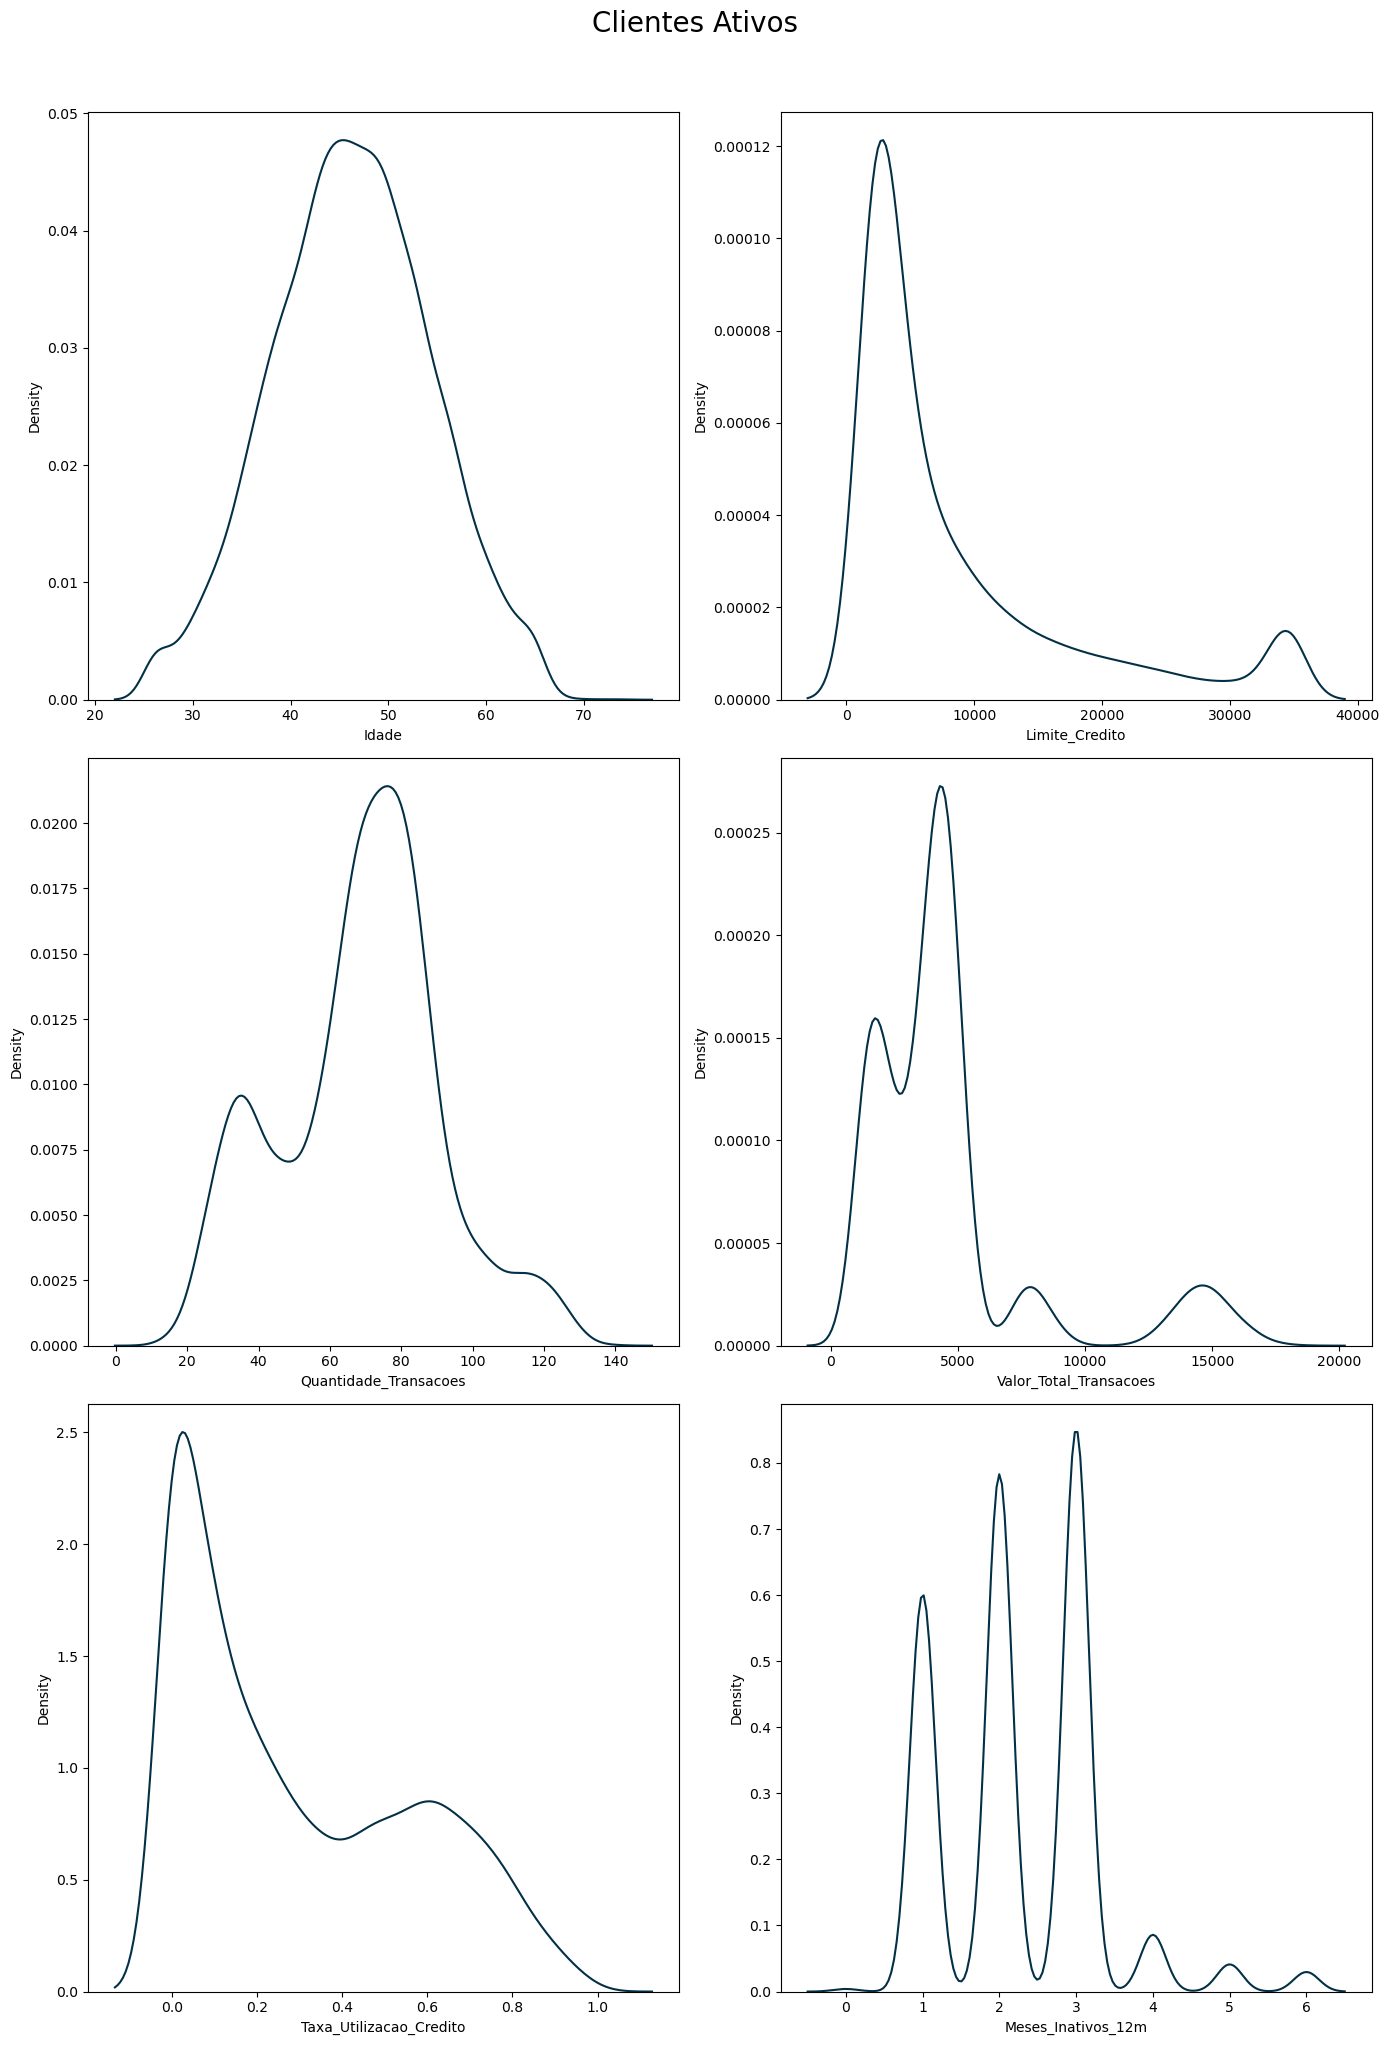

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True

# f é a figura, axes é uma matriz 3x2
f, axes = plt.subplots(3, 2) 

# Dica: flatten() transforma a matriz 3x2 em uma lista linear de 6 elementos
# Isso evita que você tenha que controlar 'linha' e 'coluna' manualmente
for i, ax in zip(label, axes.flatten()):
    sns.kdeplot(data=ativos, x=i, color="#023047", ax=ax)
    # Se quiser título em cada subgráfico:
    # ax.set_title(f"Distribuição de {i}")

# O segredo para o título principal:
plt.suptitle("Clientes Ativos", fontsize=20, y=1.02)

plt.savefig(fig_gauss_path,dpi = 300)
plt.show()

In [25]:
for l in label:
    
    r = dagostinho(cancelados[l].values,0.05)
    print(f"{l}: Test D'Agostinho = {r}")

Idade: Test D'Agostinho = non-standard distribution
Limite_Credito: Test D'Agostinho = non-standard distribution
Quantidade_Transacoes: Test D'Agostinho = non-standard distribution
Valor_Total_Transacoes: Test D'Agostinho = non-standard distribution
Taxa_Utilizacao_Credito: Test D'Agostinho = non-standard distribution
Meses_Inativos_12m: Test D'Agostinho = non-standard distribution


In [13]:
fig_gauss_path_c = catchPath('image/gauss_dist_cancelados.png')
fig_gauss_path_c

'/ML/image/gauss_dist_cancelados.png'

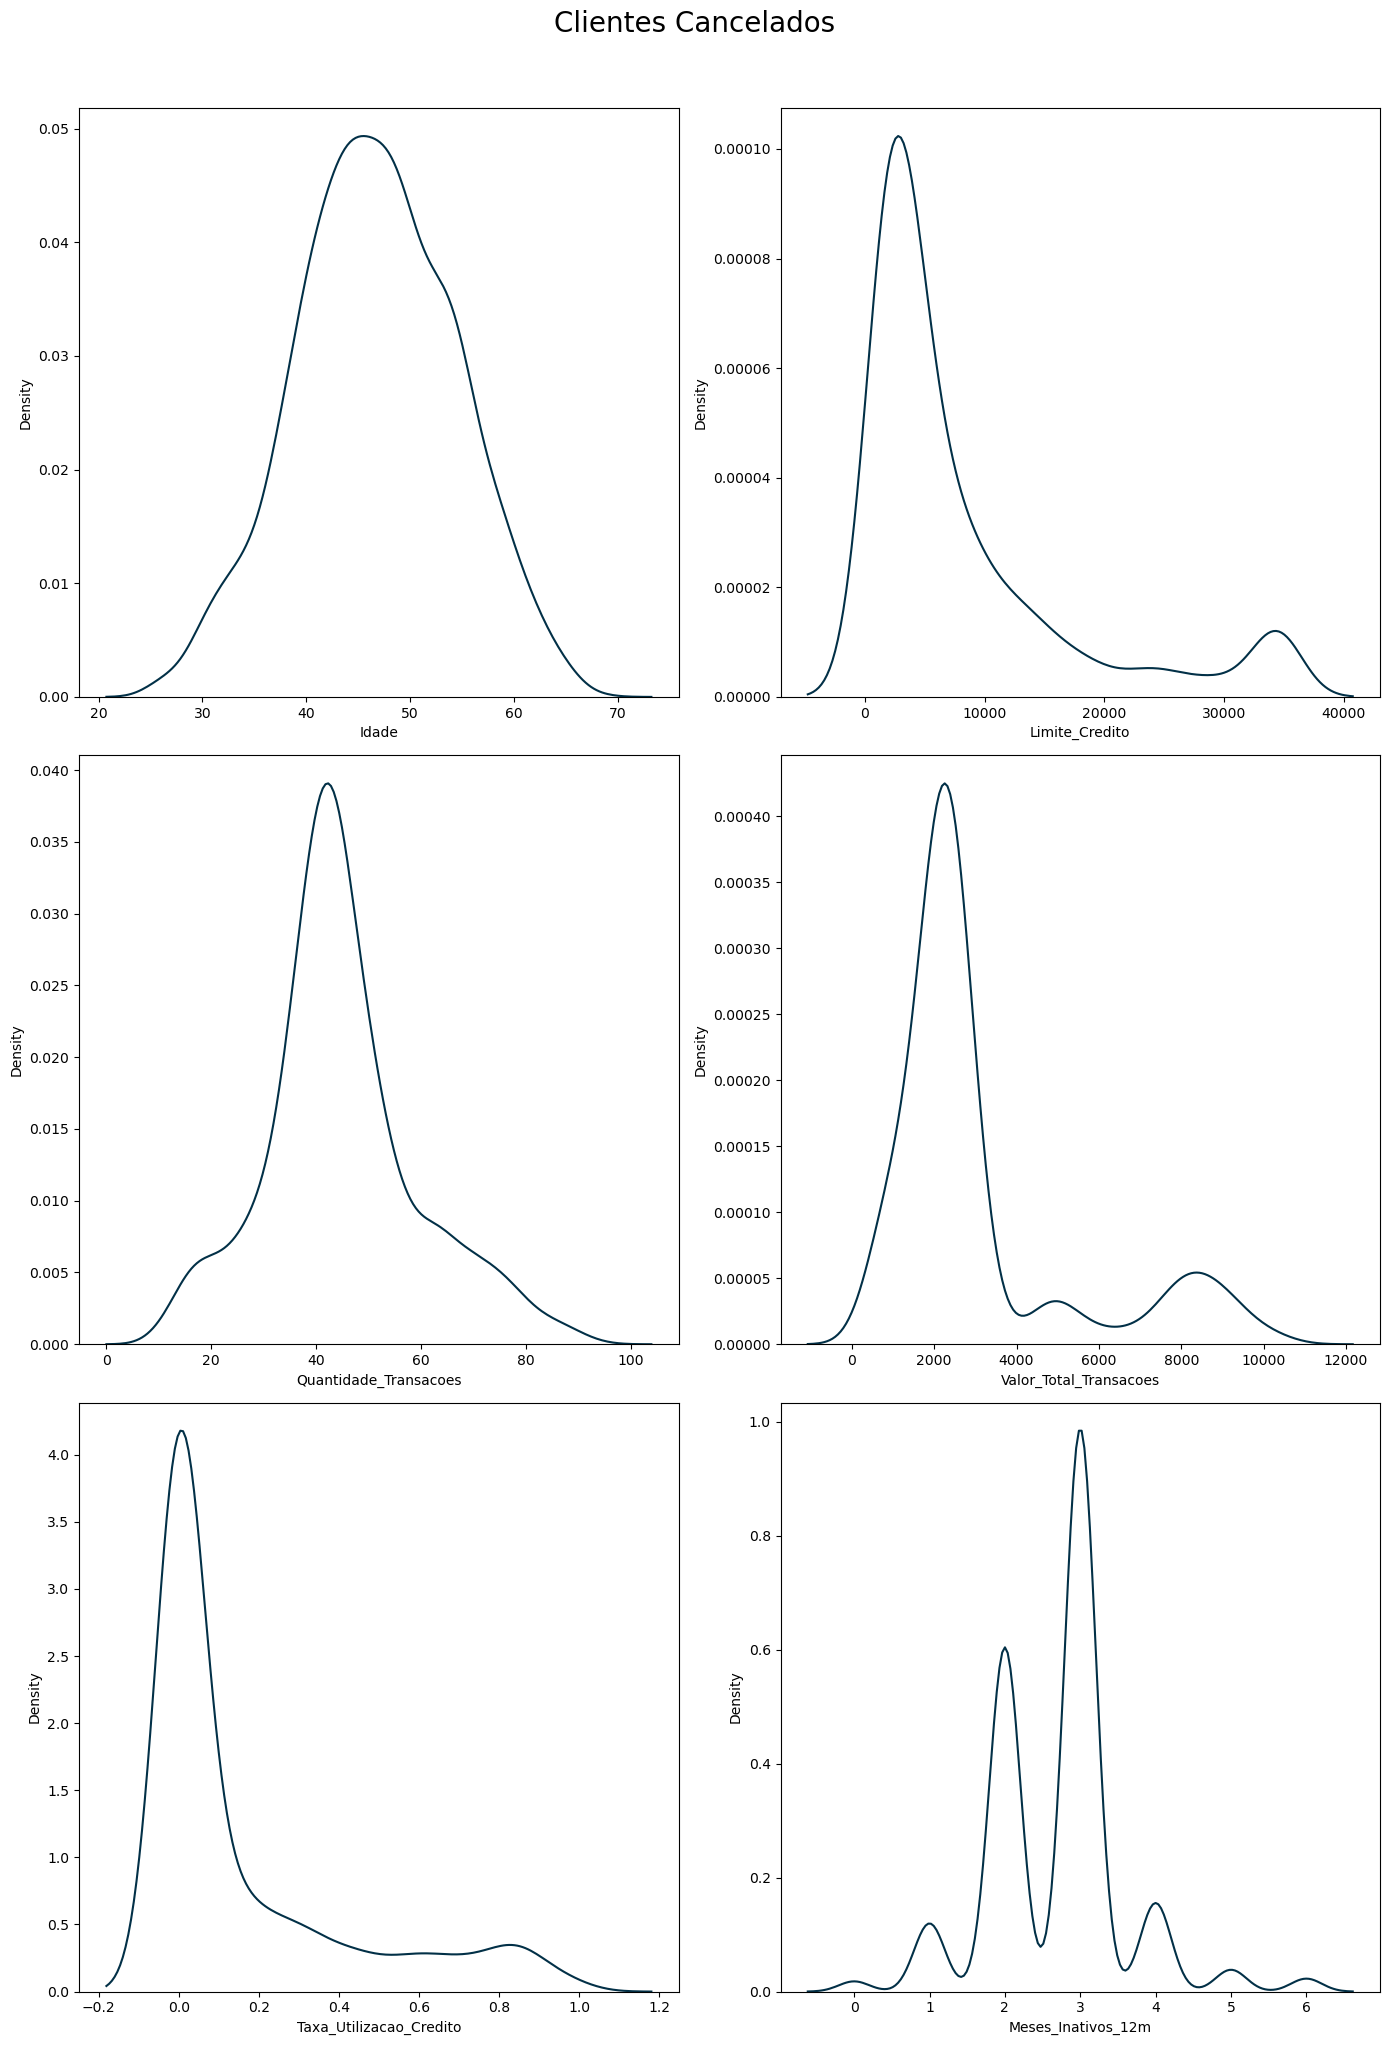

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True

# f é a figura, axes é uma matriz 3x2
f, axes = plt.subplots(3, 2) 


for i, ax in zip(label, axes.flatten()):
    sns.kdeplot(data=cancelados, x=i, color="#023047", ax=ax)


plt.suptitle("Clientes Cancelados", fontsize=20, y=1.02)

plt.savefig(fig_gauss_path_c,dpi = 300)
plt.show()

# Analise Pareada

In [45]:
df_num.head(3)

,Idade,Limite_Credito,Quantidade_Transacoes,Valor_Total_Transacoes,Taxa_Utilizacao_Credito,Meses_Inativos_12m,Status_Cliente
0,45,12691.0,42,1144,0.061,1,Cliente Ativo
1,49,8256.0,33,1291,0.105,1,Cliente Ativo
2,51,3418.0,20,1887,0.000,1,Cliente Ativo


In [23]:
# Tabela com as Medianas calculadas para os parametros
variaveis = [
    "Quantidade_Transacoes",
    "Valor_Total_Transacoes",
    "Meses_Inativos_12m",
    "Taxa_Utilizacao_Credito",
    "Limite_Credito",
    "Idade"
]

resultados = [analise_pareada(df_num, v) for v in variaveis]

df_resultados = pd.DataFrame(resultados)
df_resultados

,Variavel,Mediana_Ativo,Mediana_Cancelado,U,p_valor,r
0,Quantidade_Transacoes,71.000,43.0,11003326.0,0.000000e+00,-0.591283
1,Valor_Total_Transacoes,4100.000,2329.0,9347620.0,2.719009e-112,-0.351838
2,Meses_Inativos_12m,2.000,3.0,5142082.0,5.423116e-67,0.256360
3,Taxa_Utilizacao_Credito,0.211,0.0,9509093.5,2.869097e-129,-0.375190
4,Limite_Credito,4643.500,4178.0,7468152.0,3.007841e-07,-0.080032
5,Idade,46.000,47.0,6724539.5,7.809995e-02,0.027508


# Analise Gráfica

### Quantidade_transações

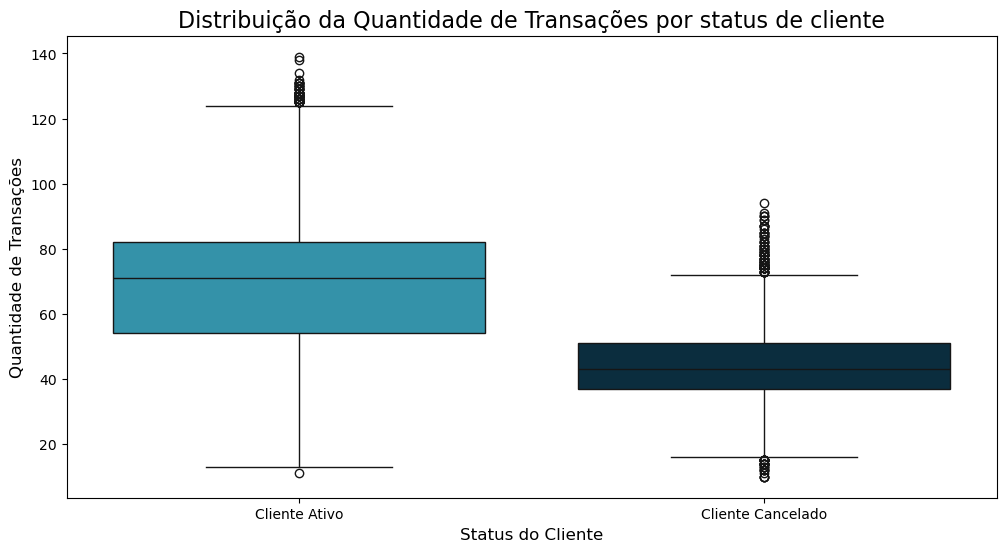

In [10]:
# Grafico BoxPlot
makeplotbox(df_num, 'box_plot_quantidade_transacoes', 'Distribuição da Quantidade de Transações por status de cliente', 'Quantidade_Transacoes', 'Quantidade de Transações')

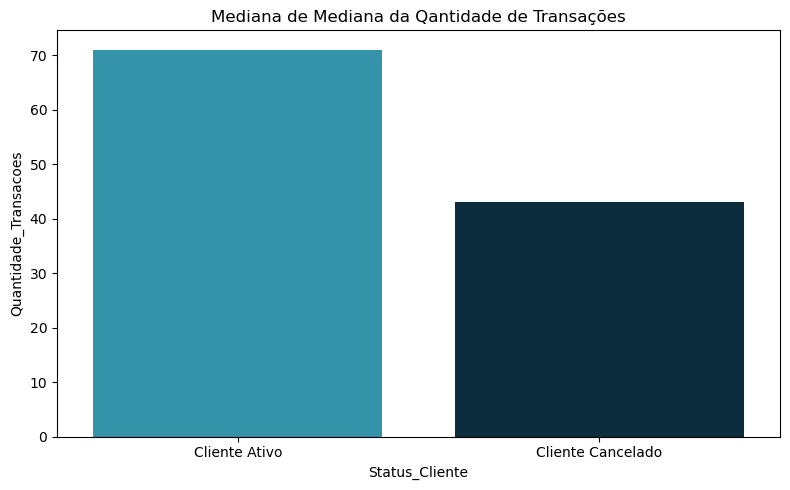

In [11]:
#Gráfico de Barras das Medianas
makeBarPlot(df_num, "Quantidade_Transacoes", "Mediana da Qantidade de Transações", "barplot_mediana_quantidade_transacoes")

### Valor_Total_Transacoes	

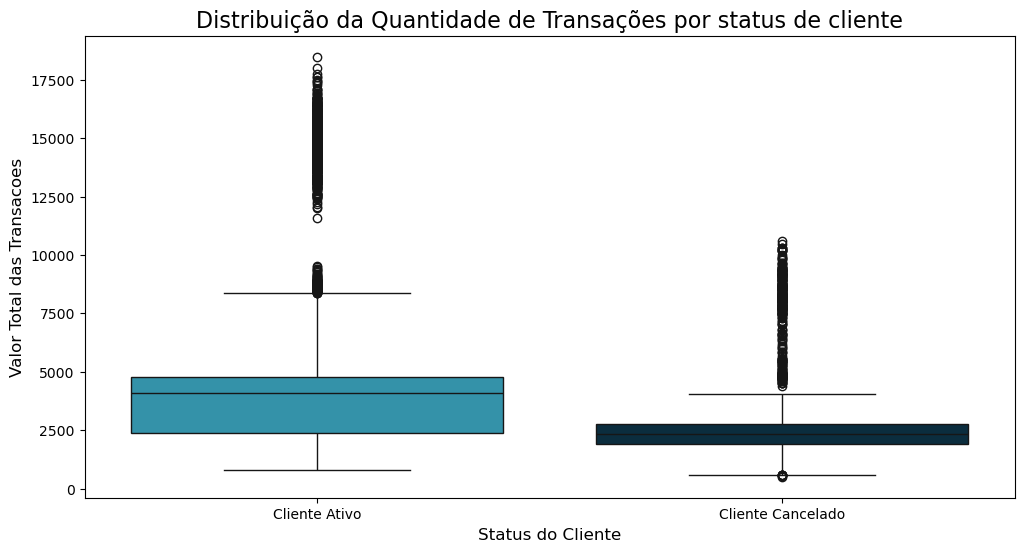

In [14]:
# Grafico BoxPlot
makeplotbox(df_num, 'box_plot_valor_total_transacoes', 'Distribuição da Quantidade de Transações por status de cliente', 'Valor_Total_Transacoes', 'Valor Total das Transacoes')

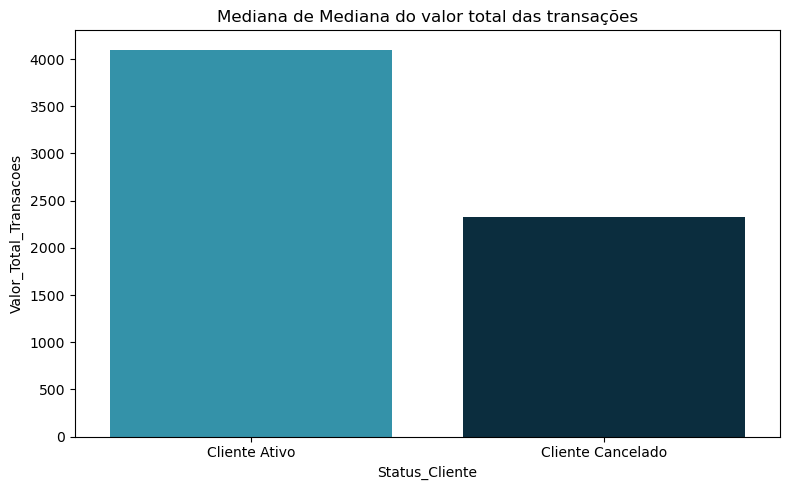

In [15]:
#Gráfico de Barras das Medianas
makeBarPlot(df_num, 'Valor_Total_Transacoes', "Mediana do valor total das transações", "barplot_mediana_do_valor_total_transacoes")

### Meses_Inativos_12m	

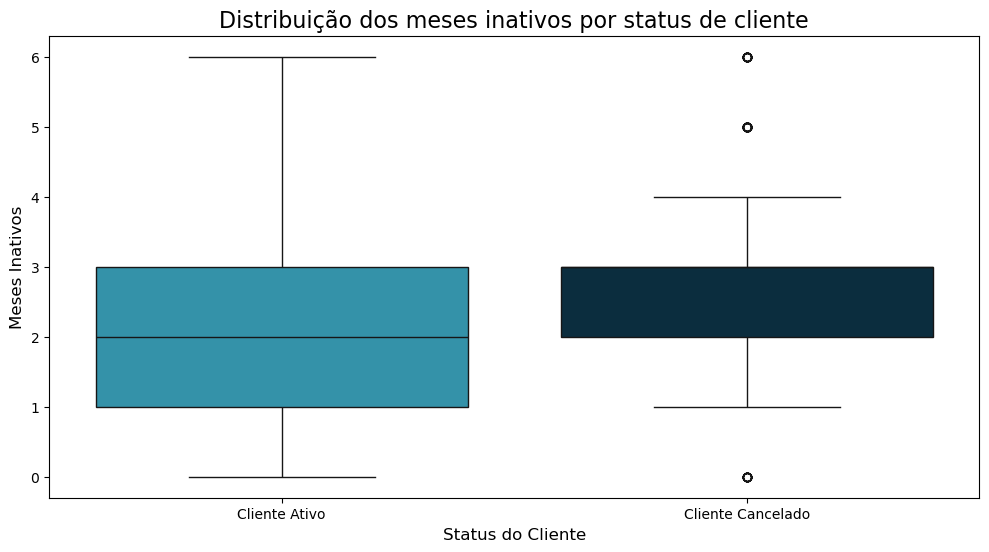

In [17]:
# Grafico BoxPlot
makeplotbox(df_num, 'box_plot_valor_total_transacoes', 'Distribuição dos meses inativos por status de cliente', 'Meses_Inativos_12m', 'Meses Inativos')

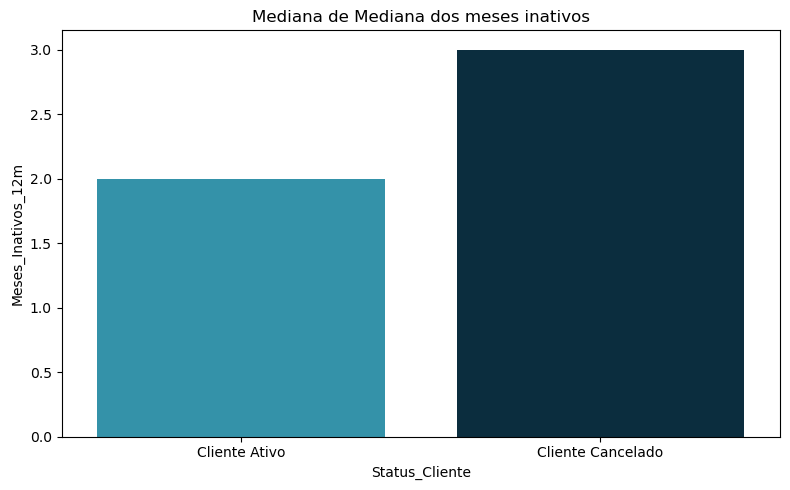

In [18]:
#Gráfico de Barras das Medianas
makeBarPlot(df_num, 'Meses_Inativos_12m', "Mediana dos meses inativos", "barplot_mediana_Meses_Inativos_12m")

### Taxa_Utilizacao_Credito

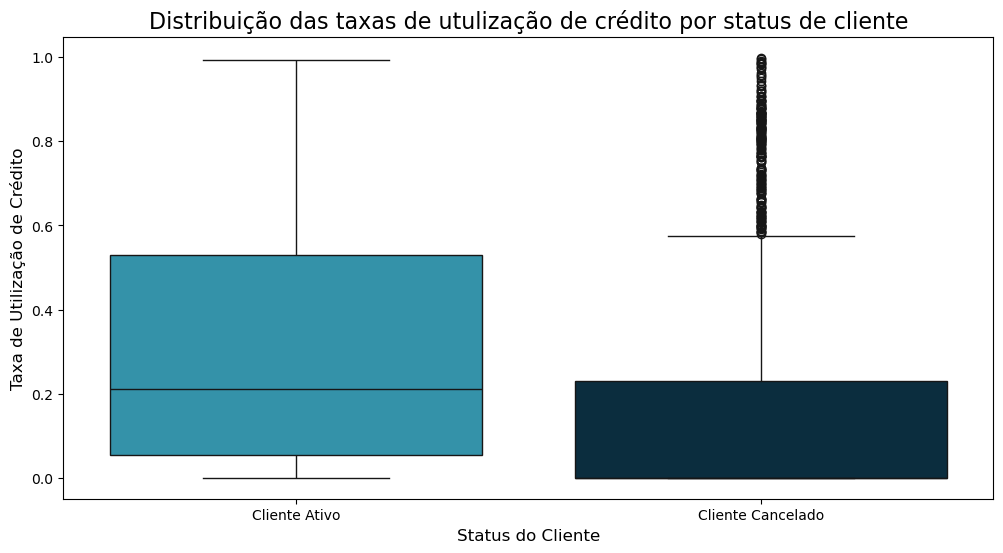

In [19]:
# Grafico BoxPlot
makeplotbox(df_num, 'box_plot_Taxa_Utilizacao_Credito', 'Distribuição das taxas de utulização de crédito por status de cliente', "Taxa_Utilizacao_Credito", 'Taxa de Utilização de Crédito')

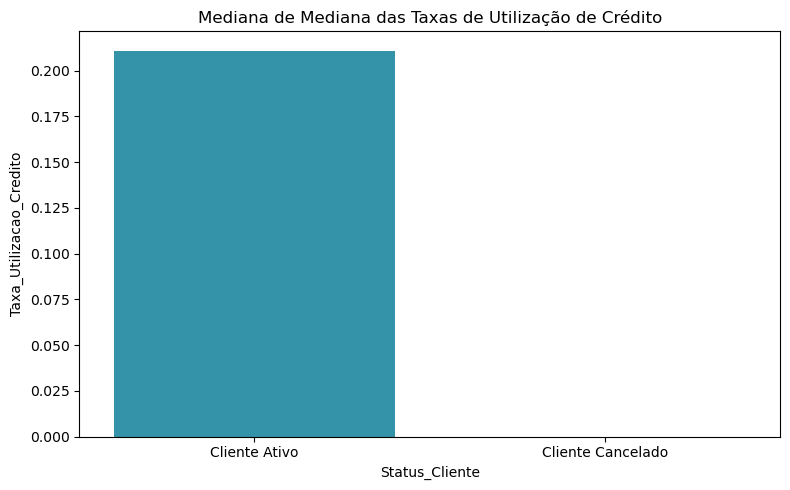

In [20]:
#Gráfico de Barras das Medianas
makeBarPlot(df_num, "Taxa_Utilizacao_Credito", "Mediana das Taxas de Utilização de Crédito", "barplot_mediana_Taxa_Utilizacao_Credito")

### Limite_Credito

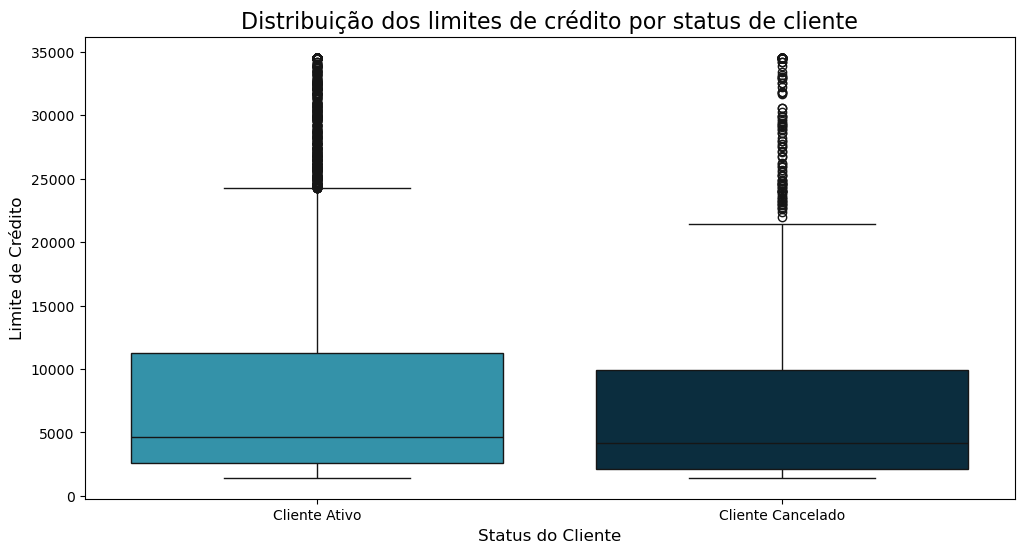

In [21]:
# Grafico BoxPlot
makeplotbox(df_num, 'box_plot_Taxa_Utilizacao_Credito', 'Distribuição dos limites de crédito por status de cliente', "Limite_Credito", 'Limite de Crédito')

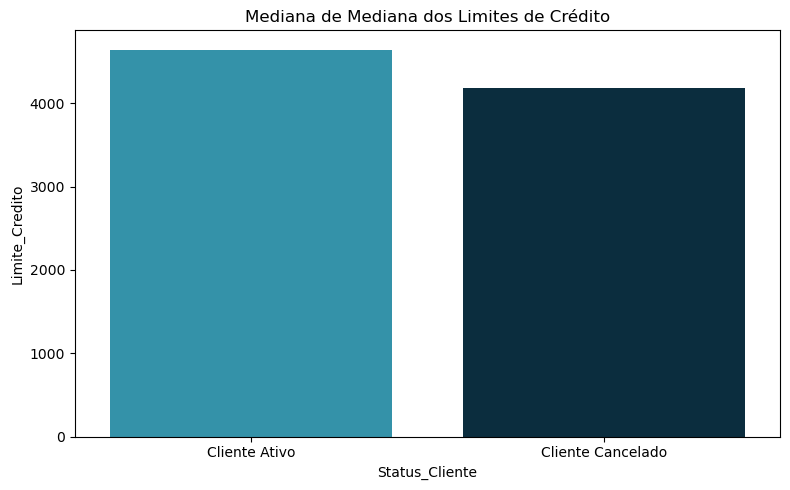

In [22]:
#Gráfico de Barras das Medianas
makeBarPlot(df_num, "Limite_Credito", "Mediana dos Limites de Crédito", "barplot_mediana_Limite_Credito")

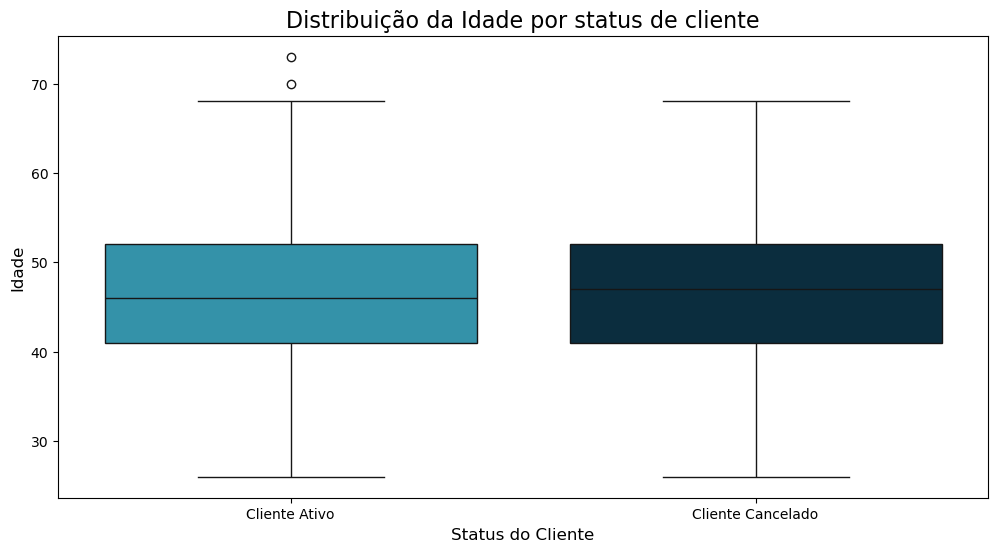

In [24]:
# Grafico BoxPlot
makeplotbox(df_num, 'box_plot_Idade', 'Distribuição da Idade por status de cliente', "Idade", 'Idade')

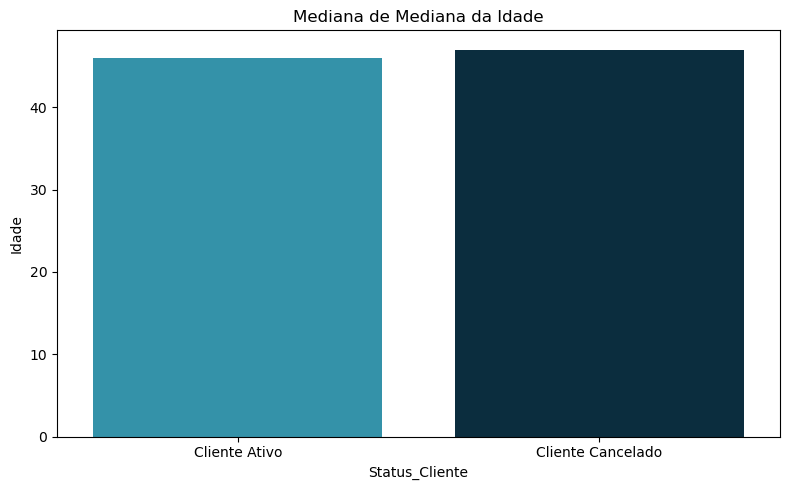

In [25]:
#Gráfico de Barras das Medianas
makeBarPlot(df_num, "Idade", "Mediana da Idade", "barplot_mediana_Idade")

A análise pareada revelou diferenças estatisticamente significativas entre clientes ativos e cancelados em todas as variáveis analisadas (p < 0.001). Entretanto, o tamanho de efeito variou substancialmente entre elas.

A variável Quantidade_Transacoes apresentou o maior poder discriminativo (r = −0.59), indicando uma diferença forte e relevante entre os grupos. Variáveis relacionadas ao comportamento financeiro, como Valor_Total_Transacoes (r = −0.35) e Taxa_Utilizacao_Credito (r = −0.38), também demonstraram efeito moderado.

Por outro lado, embora Limite_Credito tenha apresentado significância estatística, seu tamanho de efeito foi desprezível (r = −0.08), sugerindo baixo impacto prático na diferenciação entre clientes ativos e cancelados.

A variável idade não apresentou diferença estatisticamente significativa entre clientes ativos e cancelados (p = 0.078), além de apresentar tamanho de efeito desprezível (r = 0.03), indicando baixo valor discriminativo.


## 📌 Tabela Final de Decisão de Features 

| Variável | Tamanho de Efeito | Correlação entre Variáveis | Decisão |
|--|--|--|--|
| Quantidade_Transacoes | Grande | Alta com Valor_Total_Transacoes (ρ = 0.88) | ✅ Manter |
| Valor_Total_Transacoes | Médio | **Muito alta** com Quantidade_Transacoes (ρ = 0.88) | ❌ Substituir |
| Taxa_Utilizacao_Credito | Médio | Moderada com Limite_Credito (ρ = -0.42) | ✅ Manter |
| Meses_Inativos_12m | Pequeno–Médio | Baixa correlação com as demais | ✅ Manter |
| Limite_Credito | Baixo | Moderada com Taxa_Utilizacao_Credito | ⚠️ Opcional |


A decisão de seleção das variáveis considerou simultaneamente o tamanho de efeito obtido na análise pareada e o nível de correlação entre as features, com o objetivo de reduzir redundância e minimizar problemas de multicolinearidade na etapa de modelagem preditiva.


In [51]:
df.head()

,ID_Cliente,Status_Cliente,Idade,Genero,Numero_Dependentes,Nivel_Educacao,Estado_Civil,Faixa_Renda,Categoria_Cartao,Meses_Relacionamento,...,Contatos_12m,Limite_Credito,Saldo_Rotativo,Limite_Disponivel,Variacao_Valor_Transacoes,Valor_Total_Transacoes,Quantidade_Transacoes,Variacao_Qtd_Transacoes,Taxa_Utilizacao_Credito,classe
0,768805383,Cliente Ativo,45,Masculino,3,Ensino Médio,Casado,60k a 80k,Azul,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,Cliente Ativo,49,Feminino,5,Graduação,Solteiro,Menos de 40k,Azul,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,713982108,Cliente Ativo,51,Masculino,3,Graduação,Casado,80k a 120k,Azul,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,769911858,Cliente Ativo,40,Feminino,4,Ensino Médio,Não Informado,Menos de 40k,Azul,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,709106358,Cliente Ativo,40,Masculino,3,Sem Escolaridade,Casado,60k a 80k,Azul,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [52]:
numerical_features = df.select_dtypes('number').columns.tolist()

In [54]:
numerical_features 

['ID_Cliente',
 'Idade',
 'Numero_Dependentes',
 'Meses_Relacionamento',
 'Total_Produtos',
 'Meses_Inativos_12m',
 'Contatos_12m',
 'Limite_Credito',
 'Saldo_Rotativo',
 'Limite_Disponivel',
 'Variacao_Valor_Transacoes',
 'Valor_Total_Transacoes',
 'Quantidade_Transacoes',
 'Variacao_Qtd_Transacoes',
 'Taxa_Utilizacao_Credito',
 'classe']

In [53]:
data_NUM = pd.DataFrame(df[numerical_features])
data_NUM.head()

,ID_Cliente,Idade,Numero_Dependentes,Meses_Relacionamento,Total_Produtos,Meses_Inativos_12m,Contatos_12m,Limite_Credito,Saldo_Rotativo,Limite_Disponivel,Variacao_Valor_Transacoes,Valor_Total_Transacoes,Quantidade_Transacoes,Variacao_Qtd_Transacoes,Taxa_Utilizacao_Credito,classe
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [55]:
col2 = ['Idade',
 'Numero_Dependentes',
 'Meses_Relacionamento',
 'Total_Produtos',
 'Meses_Inativos_12m',
 'Contatos_12m',
 'Limite_Credito',
 'Saldo_Rotativo',
 'Limite_Disponivel',
 'Variacao_Valor_Transacoes',
 'Valor_Total_Transacoes',
 'Quantidade_Transacoes',
 'Variacao_Qtd_Transacoes',
 'Taxa_Utilizacao_Credito']

In [56]:
# Normalizing Data
X = norm_Data(data_NUM,col2)
X.head()

,Idade,Numero_Dependentes,Meses_Relacionamento,Total_Produtos,Meses_Inativos_12m,Contatos_12m,Limite_Credito,Saldo_Rotativo,Limite_Disponivel,Variacao_Valor_Transacoes,Valor_Total_Transacoes,Quantidade_Transacoes,Variacao_Qtd_Transacoes,Taxa_Utilizacao_Credito
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [57]:
y = data_NUM['classe'].values

In [58]:
from sklearn.feature_selection import SelectFdr, f_classif

In [59]:
select = SelectFdr(f_classif, alpha = 0.05)

In [60]:
X_new = select.fit(X, y)

In [61]:
X_new.get_feature_names_out()

array(['Total_Produtos', 'Meses_Inativos_12m', 'Contatos_12m',
       'Limite_Credito', 'Saldo_Rotativo', 'Variacao_Valor_Transacoes',
       'Valor_Total_Transacoes', 'Quantidade_Transacoes',
       'Variacao_Qtd_Transacoes', 'Taxa_Utilizacao_Credito'], dtype=object)